<a href="https://colab.research.google.com/github/NewTAs/GoogLeNet/blob/main/Lee_Test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import re
import glob
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf

from google.colab import drive
drive.mount('Lee_dataset')

Mounted at Lee_dataset


In [2]:
numberOfClass = 2
pictureWeightHeightSize = 224

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_Datasets/11/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),
        batch_size=numberOfClass,
        class_mode='categorical')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_Datasets/12/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')

Found 240 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [3]:
from tensorflow.keras.applications import ResNet50

model = ResNet50(include_top=True, weights=None, input_shape=(224, 224, 3), pooling=max, classes=2)

In [4]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [5]:
model.fit(train_generator, epochs=100, validation_data=test_generator)

Epoch 1/100
120/120 [==============================] - 108s 757ms/step - loss: 1.7202 - accuracy: 0.5667 - val_loss: 1.9794 - val_accuracy: 0.5000
Epoch 2/100
120/120 [==============================] - 16s 131ms/step - loss: 0.5919 - accuracy: 0.7792 - val_loss: 1.7168 - val_accuracy: 0.5000
Epoch 3/100
120/120 [==============================] - 16s 130ms/step - loss: 0.5136 - accuracy: 0.8292 - val_loss: 0.1095 - val_accuracy: 0.9667
Epoch 4/100
120/120 [==============================] - 16s 130ms/step - loss: 0.2315 - accuracy: 0.9333 - val_loss: 0.1617 - val_accuracy: 0.9333
Epoch 5/100
120/120 [==============================] - 16s 130ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 6/100
120/120 [==============================] - 15s 129ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 7/100
120/120 [==============================] - 15s 128ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0026 

In [6]:
print("-- Evaluate --")
scores = model.evaluate(test_generator)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
30/30 [==============================] - 1s 37ms/step - loss: 0.0208 - accuracy: 1.0000
accuracy: 100.00%


In [7]:
import matplotlib.pyplot as plt

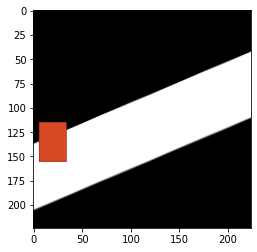

In [8]:
img_path = '/content/Lee_dataset/MyDrive/Lee_dataset/13/001.png'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

In [9]:
for i in range(9):
  img_path = '/content/Lee_dataset/MyDrive/Lee_dataset/13/00' + str(i+1)+'.png'
  img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)
  img_preprocessed = tf.keras.applications.resnet50.preprocess_input(img_batch)
  prediction = model.predict(img_preprocessed)
  print(prediction)

[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]


In [25]:
print("-- Predict --")
output = model.predict(test_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'0': 0, '1': 1}
[[1.000 0.000]
 [1.000 0.000]
 [1.000 0.000]
 [0.054 0.946]
 [1.000 0.000]
 [1.000 0.000]
 [1.000 0.000]
 [1.000 0.000]
 [1.000 0.000]
 [1.000 0.000]
 [0.001 0.999]
 [1.000 0.000]
 [1.000 0.000]
 [0.223 0.777]
 [0.003 0.997]
 [0.001 0.999]
 [0.020 0.980]
 [1.000 0.000]
 [0.053 0.947]
 [0.001 0.999]
 [0.007 0.993]
 [0.003 0.997]
 [1.000 0.000]
 [0.002 0.998]
 [0.002 0.998]
 [1.000 0.000]
 [0.001 0.999]
 [0.001 0.999]
 [1.000 0.000]
 [1.000 0.000]
 [1.000 0.000]
 [0.006 0.994]
 [1.000 0.000]
 [0.002 0.998]
 [1.000 0.000]
 [0.001 0.999]
 [0.003 0.997]
 [0.001 0.999]
 [1.000 0.000]
 [1.000 0.000]
 [0.070 0.930]
 [0.001 0.999]
 [0.028 0.972]
 [1.000 0.000]
 [1.000 0.000]
 [0.177 0.823]
 [1.000 0.000]
 [0.001 0.999]
 [0.057 0.943]
 [1.000 0.000]
 [1.000 0.000]
 [0.331 0.669]
 [1.000 0.000]
 [0.055 0.945]
 [1.000 0.000]
 [0.011 0.989]
 [1.000 0.000]
 [0.002 0.998]
 [0.002 0.998]
 [1.000 0.000]]


In [26]:
print(test_generator.filenames)

['0/031.png', '0/031lr.png', '0/031r180.png', '0/031r270.png', '0/031r90.png', '0/031ud.png', '0/032.png', '0/032lr.png', '0/032r180.png', '0/032r270.png', '0/032r90.png', '0/032ud.png', '0/034.png', '0/034lr.png', '0/034r180.png', '0/034r270.png', '0/034r90.png', '0/034ud.png', '0/035.png', '0/035lr.png', '0/035r180.png', '0/035r270.png', '0/035r90.png', '0/035ud.png', '0/037.png', '0/037lr.png', '0/037r180.png', '0/037r270.png', '0/037r90.png', '0/037ud.png', '1/031.png', '1/031lr.png', '1/031r180.png', '1/031r270.png', '1/031r90.png', '1/031ud.png', '1/032.png', '1/032lr.png', '1/032r180.png', '1/032r270.png', '1/032r90.png', '1/032ud.png', '1/037.png', '1/037lr.png', '1/037r180.png', '1/037r270.png', '1/037r90.png', '1/037ud.png', '1/039.png', '1/039lr.png', '1/039r180.png', '1/039r270.png', '1/039r90.png', '1/039ud.png', '1/040.png', '1/040lr.png', '1/040r180.png', '1/040r270.png', '1/040r90.png', '1/040ud.png']


In [27]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = test_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_dataset/13/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')

Found 10 images belonging to 1 classes.


In [28]:
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.class_indices)
print(output)

-- Predict --
{'0': 0}
[[0.003 0.997]
 [0.017 0.983]
 [0.046 0.954]
 [1.000 0.000]
 [1.000 0.000]
 [0.006 0.994]
 [0.002 0.998]
 [0.166 0.834]
 [0.020 0.980]
 [1.000 0.000]]


In [22]:
print(val_generator.filenames)

['0/001.png', '0/002.png', '0/003.png', '0/004.png', '0/005.png', '0/006.png', '0/007.png', '0/008.png', '0/009.png', '0/010.png']
